**Dark energy project**

Since last year, energy prices have risen steadly, reaching critical levels as early as the end of 2021 and experiencing further rises following the Russian invasion of Ukraine. The absolute star of this flare-up in commodity prices has been natural gas. Energy price dynamics are affecting the whole world but particularly European countries.
This project aims to analyze how the structure of each country's energy mix affects the price of electricity charged to the end consumer. The energy mix of a country refers to the proportion of different energy sources used to generate eletricity. These sources can include fossil fuels such as coal, natural gas and oil, as well as renewable sources such as solar or wind. In particular, we are interested in understanding whether the choice of not being dependent on gas and oil turns out to be a good solution to limit the effect of inflation.





We install and load the libraries we need.

In [8]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
pip install pandas-bokeh

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (FormatStrFormatter) #per formattare l'asse delle x che veniva esponenziale
import numpy as np
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
 #Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource
from bokeh.models import BasicTickFormatter
from bokeh.io import show
from bokeh.models import CustomJS, Dropdown
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sn
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from ipywidgets import widgets
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.layouts import row
from bokeh.plotting import figure
import plotly.graph_objects as go

We load the dataset stored in Google Drive.
This dataset was uploaded on the Eurostat website. It contanins data concerning the quantity of each energy source for each european country for years 2018, 2019, 2020, 2021.


In [5]:
link = 'https://drive.google.com/open?id=1Ou5R-weoeIaxaQ1N9MgOxAplJn3Xxwq-' # The shareable link

In [6]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1Ou5R-weoeIaxaQ1N9MgOxAplJn3Xxwq-


In [7]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('energy mix.xlsx')
df = pd.read_excel('energy mix.xlsx')
# Dataset is now stored in a Pandas Dataframe



Columns labels need to be modified to access to data.

In [ ]:
df.rename(columns = {'SIEC (Labels)':'Country'},inplace=True)
df1=pd.DataFrame(df).set_index("Country")
df1

,18Total,18Solid fossil fuels,18Manufactured gases,18Peat and peat products,18Oil shale and oil sands,18Natural gas,18Oil and petroleum products (excluding biofuel portion),18Renewables and biofuels,18Non-renewable waste,18Nuclear heat,...,21Manufactured gases,21Peat and peat products,21Oil shale and oil sands,21Natural gas,21Oil and petroleum products (excluding biofuel portion),21Renewables and biofuels,21Non-renewable waste,21Nuclear heat,21Electricity,21Heat
Country,,,,,,,,,,,,,,,,,,,,,
GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
European Union - 27 countries (from 2020),1.773129e+07,2446876.956,0.0,27488.534,47359.673,3778520.363,6362939.165,2614219.058,161744.404,2270729.728,...,0.0,15931.578,31702.779,3959126.553,5802486.439,2925913.297,168577.199,2170884.953,7356.626,12869.001
Belgium,7.442248e+05,35826.162,0.0,0.000,0.000,175205.240,374264.714,49405.573,7427.500,80954.825,...,0.0,0.0,0.0,177216.779,335955.973,59582.612,7689.722,142156.025,-7876.5,3683.956
Bulgaria,2.219596e+05,65520.139,0.0,0.000,0.000,30379.215,54701.457,29557.204,581.978,48477.329,...,0.0,0.0,0.0,33040.163,54157.896,33902.212,863.136,49950.199,-8778.315,707.704
Czechia,5.075222e+05,183931.762,0.0,0.000,0.000,79306.188,114148.254,53120.004,4029.610,86631.870,...,0.0,0.0,0.0,90675.107,110132.3,63999.447,4257.852,88872.18,-11075.265,128.386
Denmark,2.147710e+05,18177.444,0.0,0.000,0.000,31104.105,88825.862,66345.776,5061.891,0.000,...,0.0,0.0,0.0,22485.735,75802.717,82159.297,5074.949,0.0,4868.837,30.822
Germany,3.681589e+06,811059.827,0.0,0.000,0.000,855412.055,1281180.051,506011.521,49051.111,227610.730,...,0.0,0.0,0.0,908340.092,1131987.046,541404.116,49094.167,206648.697,-18575.0,0.0
Estonia,7.006221e+04,194.722,0.0,394.520,47359.673,5003.573,4982.425,13445.316,578.982,0.000,...,0.0,55.3,31702.779,4863.19,2186.096,15349.915,417.821,0.0,2629.033,0.0
Ireland,1.753869e+05,9164.640,0.0,7064.303,0.000,52190.810,88111.323,17191.829,1691.759,0.000,...,0.0,4056.844,0.0,50902.785,80399.578,19084.913,1661.237,0.0,1587.593,0.0


Some countries lack of information for year 2020 and 2021. Looking at them deeperly, they are not part of European Union. This may be the reason why data are not available on Eurostat websites.
We delete them from the dataset.

In [ ]:


empty_countries=list()
for country in df1.index:
  for columns in df1.columns:
    if type(df1[columns].loc[country])==str:
      if country not in empty_countries:
        empty_countries.append(country)

print(empty_countries)
df2=df1.drop(index=empty_countries)
#df2

['Iceland', 'Norway', 'United Kingdom', 'Montenegro', 'North Macedonia', 'Albania', 'Serbia', 'Türkiye', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Ukraine']


Our statistical population looks too wide and so difficult to visualize in charts. So for a better explaination we have dropped less significant countries from the dataframe. In order to decide whether a country is small enough in terms of energy production, we have taken Romania as a benchmark.
In 'small_countries' list there are countries whose energy production in 2018 was less then the Romanian one. Thus, our population has been restricted to the 12 most significant countries: Sweden, Belgium, Czechia, Germany, Spain, France, Italy, Netherlands, Austria, Poland, Romania, Finland.

In [ ]:
small_countries=list()
for country in df2.index:
  if df2['18Total'].loc[country]<df2['18Total'].loc['Romania']:
      small_countries.append(country)
print(small_countries)

['Bulgaria', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Portugal', 'Slovenia', 'Slovakia']


Furthermore, we drop columns refered to the total energy and eletricity production for each country to be able to see only each country energy mix.  

In [ ]:
small_countries.append('GEO (Labels)')
small_countries.append('European Union - 27 countries (from 2020)')
df3=df2.drop(index=small_countries,columns=['18Total','19Total','20Total','21Total','18Electricity','19Electricity','20Electricity','21Electricity'])

In [ ]:
df3.index

Index(['Belgium', 'Czechia', 'Germany', 'Spain', 'France', 'Italy',
       'Netherlands', 'Austria', 'Poland', 'Romania', 'Finland', 'Sweden'],
      dtype='object', name='Country')

All column formats need to be converted in the same format. We choose numpy64.

In [ ]:
for columns in df3.columns:
  df3[columns]=df3[columns].astype(np.float64)

In [ ]:
df3

,18Solid fossil fuels,18Manufactured gases,18Peat and peat products,18Oil shale and oil sands,18Natural gas,18Oil and petroleum products (excluding biofuel portion),18Renewables and biofuels,18Non-renewable waste,18Nuclear heat,18Heat,...,21Solid fossil fuels,21Manufactured gases,21Peat and peat products,21Oil shale and oil sands,21Natural gas,21Oil and petroleum products (excluding biofuel portion),21Renewables and biofuels,21Non-renewable waste,21Nuclear heat,21Heat
Country,,,,,,,,,,,,,,,,,,,,,
Belgium,35826.162,0.0,0.000,0.0,175205.240,374264.714,49405.573,7427.500,80954.825,3813.289,...,30206.815,0.0,0.000,0.0,177216.779,335955.973,59582.612,7689.722,142156.025,3683.956
Czechia,183931.762,0.0,0.000,0.0,79306.188,114148.254,53120.004,4029.610,86631.870,261.619,...,150669.164,0.0,0.000,0.0,90675.107,110132.300,63999.447,4257.852,88872.180,128.386
Germany,811059.827,0.0,0.000,0.0,855412.055,1281180.051,506011.521,49051.111,227610.730,0.000,...,618745.473,0.0,0.000,0.0,908340.092,1131987.046,541404.116,49094.167,206648.697,0.000
Spain,133999.683,0.0,0.000,0.0,314972.500,750290.417,211238.288,6365.156,168388.444,0.000,...,36016.382,0.0,0.000,0.0,343242.973,668705.020,238524.145,6016.479,171251.750,0.000
France,106206.598,0.0,0.000,0.0,428383.834,912790.169,324338.757,19887.976,1251721.665,0.000,...,95151.266,0.0,0.000,0.0,430413.941,812944.029,358103.571,20067.449,1149788.320,0.000
Italy,99298.817,0.0,0.000,0.0,692140.822,668376.201,340546.403,13176.600,0.000,0.000,...,64403.831,0.0,0.000,0.0,726066.080,622301.239,347524.349,13279.231,0.000,0.000
Netherlands,96274.666,0.0,0.000,0.0,357556.279,494740.514,54019.848,10905.171,9446.584,2235.173,...,65026.916,0.0,0.000,0.0,351954.628,460719.318,94476.602,10427.404,10355.701,3449.288
Austria,31860.959,0.0,0.000,0.0,85626.743,145270.088,116427.257,7539.325,0.000,52.243,...,29493.940,0.0,0.000,0.0,89921.136,137696.471,124376.771,7904.826,0.000,47.034
Poland,572778.420,0.0,0.000,0.0,187523.320,361284.050,142875.170,11755.075,0.000,257.720,...,533979.641,0.0,0.000,0.0,212022.840,367788.993,152141.918,11449.043,0.000,382.755


We split the data into three dictionaries, one for each year, whose keys refer to energy sources and whose values to European countries' amount of that source




In [ ]:
index_to_keep = 'European Union - 27 countries (from 2020)'
df2b = df2.drop(df2.index[df2.index != index_to_keep])
df2c=df2b.drop(columns=['18Total','19Total','20Total','21Total','18Electricity','19Electricity','20Electricity','21Electricity'])
#df2c

In [ ]:
df18 = df2c.drop(df2c.iloc[:,10:].columns,axis = 1)
df18b = df18.rename(columns={col: col[2:] for col in df18.columns})
df19 = df2c.drop(df2c.iloc[:,20:].columns,axis = 1)
df19 = df19.drop(df19.iloc[:,:10].columns,axis = 1)
df19b = df19.rename(columns={col: col[2:] for col in df19.columns})
df20 = df2c.drop(df2c.iloc[:,30:].columns,axis = 1)
df20 = df20.drop(df20.iloc[:,:20], axis=1)
df20b = df20.rename(columns={col: col[2:] for col in df20.columns})
df21 = df2c.drop(df2c.iloc[:,:30].columns,axis = 1)
df21b = df21.rename(columns={col: col[2:] for col in df21.columns})

dict18 = {k: v for d in (df18b.to_dict(orient='records')) for k, v in d.items()}
dict19 = {k: v for d in (df19b.to_dict(orient='records')) for k, v in d.items()}
dict20 = {k: v for d in (df20b.to_dict(orient='records')) for k, v in d.items()}
dict21 = {k: v for d in (df21b.to_dict(orient='records')) for k, v in d.items()}
print(dict18)
main_dict = {2018: dict18, 2019: dict19, 2020: dict20, 2021:dict21}
#print(main_dict)

{'Solid fossil fuels': 2446876.956, 'Manufactured gases': 0.0, 'Peat and peat products': 27488.534, 'Oil shale and oil sands': 47359.673, 'Natural gas': 3778520.363, 'Oil and petroleum products (excluding biofuel portion)': 6362939.165, 'Renewables and biofuels': 2614219.058, 'Non-renewable waste': 161744.404, 'Nuclear heat': 2270729.728, 'Heat': 12557.764}


In [ ]:
from ipywidgets import widgets
data = main_dict
def update_chart(year):
    labels = list(data[year].keys())
    sizes = list(data[year].values())
    fig1, ax1 = plt.subplots(figsize=(20, 13))
    ax1.pie(sizes, autopct='%1.1f%%', shadow=False,textprops = dict(color ="white"), startangle=90)
    ax1.axis('equal')
    plt.legend(labels=labels,loc='upper left')
    plt.show()
year_slider = widgets.IntSlider(min=2018, max=2021, step=1, value=2018)
widgets.interact(update_chart, year=year_slider)


interactive(children=(IntSlider(value=2018, description='year', max=2021, min=2018), Output()), _dom_classes=(…

<function __main__.update_chart(year)>

This interactive plot shows the energy mix of European union through the years. Moving the slider, we can change the year we want to represent.
In general, European Union makes a big use of oil and petrolum products and natural gas. Through the years, it has increased the use of renewables and biofuels sources.

In [ ]:
#print(df[df.columns[pd.Series(df.columns).str.startswith('18')]])
year18=df3.columns[pd.Series(df3.columns).str.startswith('18')]
year19=df3.columns[pd.Series(df3.columns).str.startswith('19')]
year20=df3.columns[pd.Series(df3.columns).str.startswith('20')]
year21=df3.columns[pd.Series(df3.columns).str.startswith('21')]
f=df3[year21].plot.barh(title='European energy mix per country in 2021',
                        ylabel='Country',stacked=False,line_width=3,
                        figsize=(1100,800))


#fig.xaxis.formatter = BasicTickFormatter(use_scientific=False)
#fig.show()


This plot shows the energy mix for the most relevant european country in 2021. Looking at the data, the energy mix does not tend to change dramatically through the years. We choose to represent it in 2021 since it is the most significant year among the others when it comes to inflation.  
Some countries capture immediatly our attention.
France has a significant consumption of nuclear heat.
Germany, on the other hand, makes a relevant use of oil and petroleum products.
Italy has substantial reliance on natural gas, making it increasly dependent on the foreign supply.




We load another dataset always stored on Google Drive.
This dataset stores the price of eletricity expressed in €/kWh for each European country in 2021 and 2022.
We are interested in analysing what country has experienced a more significant increment in price of eletricity.

In [ ]:
link='https://drive.google.com/open?id=18cx3X27bsoKSp7hiBFz7uZXFHByNKLkL'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('households electricity prices.xlsx')
electricity_price=pd.read_excel('households electricity prices.xlsx')

18cx3X27bsoKSp7hiBFz7uZXFHByNKLkL


We standardize the new dataset based on the structure of the previous one, so that we have data on the same countries.

In [ ]:
electricity_price=pd.DataFrame(electricity_price).set_index('Country')
elprice=pd.DataFrame(electricity_price)
extra_country=list()
for country in elprice.index:
  if country not in df3.index:
    extra_country.append(country)
elprice=elprice.drop(index=extra_country)

In [ ]:
for columns in elprice.columns:
  elprice[columns]=elprice[columns].astype(np.float64)

In [ ]:
link= 'https://drive.google.com/open?id=1voBfQFvD3qyVrXarHHlr0nRaZEm_m4k_'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
table = downloaded.GetContentFile('change in electricity price.xlsx')
elchg=pd.read_excel('change in electricity price.xlsx')
elchgmap=elchg

1voBfQFvD3qyVrXarHHlr0nRaZEm_m4k_


In [ ]:
elchg=pd.DataFrame(elchg).set_index('Country')
elchg=pd.DataFrame(elchg)
extra_country=list()
for country in elchg.index:
  if country not in df3.index:
    extra_country.append(country)
elchg=elchg.drop(index=extra_country)

In [ ]:
elchg=elchg.rename(columns={'Change':'Change (%)'})

In [ ]:
elchg['Change (%)']=elchg['Change (%)']*100

We plot the eletricity price data.

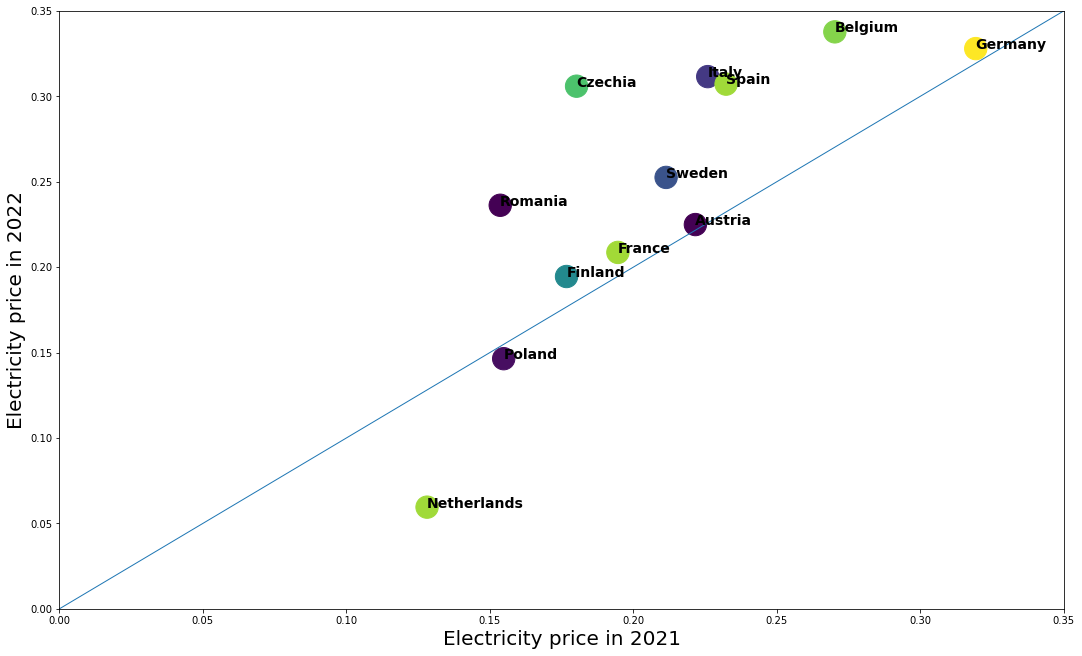

In [ ]:
colors = np.random.rand(len(list(elchg.index)))
plt.figure(figsize=(18, 11))
plt.scatter(data=elchg,x='2021S1',y='2022S1',c=colors,s=500)
plt.xlim(0, 0.35)
plt.xlabel('Electricity price in 2021',fontsize=20)
plt.ylim(0,0.35)
plt.ylabel('Electricity price in 2022',fontsize=20)
plt.plot([0, 0.35], [0, 0.35], linewidth=1)
for i, txt in enumerate(elchg.index):
  plt.annotate(txt, (elchg["2021S1"][i], elchg["2022S1"][i]),weight='bold',size=14)

plt.show()

This scatter plot shows that most countries experienced an increment in the eletricity price between 2021 and 2022.
The line represents the bisector of the quadrant (y=x).
All countries above the line have had their price increased since their y-coordinate (price in 2022) is greater than the x-coordinate (price in 2021).
Only two countries' prices have decreased, in particular Netherlands and Poland.  

We import another dataset having the eletricity price development divided by semester from 2018 to 2022 to have access to more data.

In [ ]:
link= 'https://drive.google.com/open?id=1JWNkuQVZQBwBgjdZRctjPv1C99MnCqm6'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('electricity price developement.xlsx')
epd=pd.read_excel('electricity price developement.xlsx')
epd


1JWNkuQVZQBwBgjdZRctjPv1C99MnCqm6


,Country,2018-S1,2018-S2,2019-S1,2019-S2,2020-S1,2020-S2,2021-S1,2021-S2,2022-S1
0,Belgium,0.2824,0.2936,0.2839,0.2860,0.2792,0.2702,0.2702,0.2994,0.3377
1,Bulgaria,0.1914,0.1965,0.1950,0.1873,0.1950,0.1920,0.2002,0.2133,0.2138
2,Czechia,4.0100,4.0900,4.4900,4.5400,4.8500,4.7700,4.6600,4.79,7.54
3,Denmark,2.3279,2.3297,2.2275,2.1830,2.1148,2.0985,2.1568,2.5641,3.3921
4,Germany,0.2987,0.3000,0.3088,0.2878,0.3043,0.3006,0.3193,0.3234,0.3279
5,Estonia,0.1348,0.1418,0.1357,0.1411,0.1236,0.1291,0.1324,0.1939,0.2056
6,Ireland,0.2369,0.2539,0.2423,0.2546,0.2413,0.2616,0.2555,0.2974,0.2741
7,Greece,0.1672,0.1646,0.1595,0.1551,0.1674,0.1641,0.1680,0.1974,0.2305
8,Spain,0.2383,0.2477,0.2403,0.2394,0.2239,0.2298,0.2323,0.2816,0.3071
9,France,0.1748,0.1799,0.1778,0.1913,0.1893,0.1958,0.1946,0.2022,0.2086


In [ ]:
link= 'https://drive.google.com/open?id=1voBfQFvD3qyVrXarHHlr0nRaZEm_m4k_'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
table = downloaded.GetContentFile('change in electricity price.xlsx')
e=pd.read_excel('change in electricity price.xlsx')
type(e)
#e

1voBfQFvD3qyVrXarHHlr0nRaZEm_m4k_


pandas.core.frame.DataFrame

In [ ]:
e1=e.drop(columns=['2021S1','2022S1'])
e1.drop(index=[0,1,2,30,34,41], inplace=True)

In [ ]:
e1.loc[43, 'Country'] = 'Kosovo'
e1.loc[40, 'Country'] = 'Turkey'
e1.loc[3, 'Country'] = 'Czech Republic'
e1['CODE']='Na'
ed=pd.DataFrame(e1).set_index('Country')
#ed

In [ ]:
link= 'https://drive.google.com/open?id=109_Ag5vsauGEphyPJCA9XaVchflUf0hf'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
table = downloaded.GetContentFile('change in electricity price.xlsx')
a=pd.read_csv('change in electricity price.xlsx')
a1=a.drop(columns=['GDP (BILLIONS)'])
a2=pd.DataFrame(a1).set_index('COUNTRY')

109_Ag5vsauGEphyPJCA9XaVchflUf0hf


In [ ]:
for i in ed.index:
  for k in a2.index:
    if i==k:
      ed.at[i, 'CODE']= a2.at[k, 'CODE']

In [ ]:
for i in ed.index:
  for k in a2.index:
    if i==k:
      ed.at[i, 'CODE']= a2.at[k, 'CODE']

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = ed['CODE'],
    z = ed['Change'],
    text = ed.index,
    colorscale = 'YlOrRd',  # o 'YlOrRd' : a scale ranging from yellow to orange to red
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    #colorbar_tickprefix = '%',
    colorbar_title = 'Electricity<br>price change',
))

fig.update_layout(
    title_text='Electricity Price Change',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'))
fig.show()

This interactive geographic map shows the European countries mainly hit by inflation.

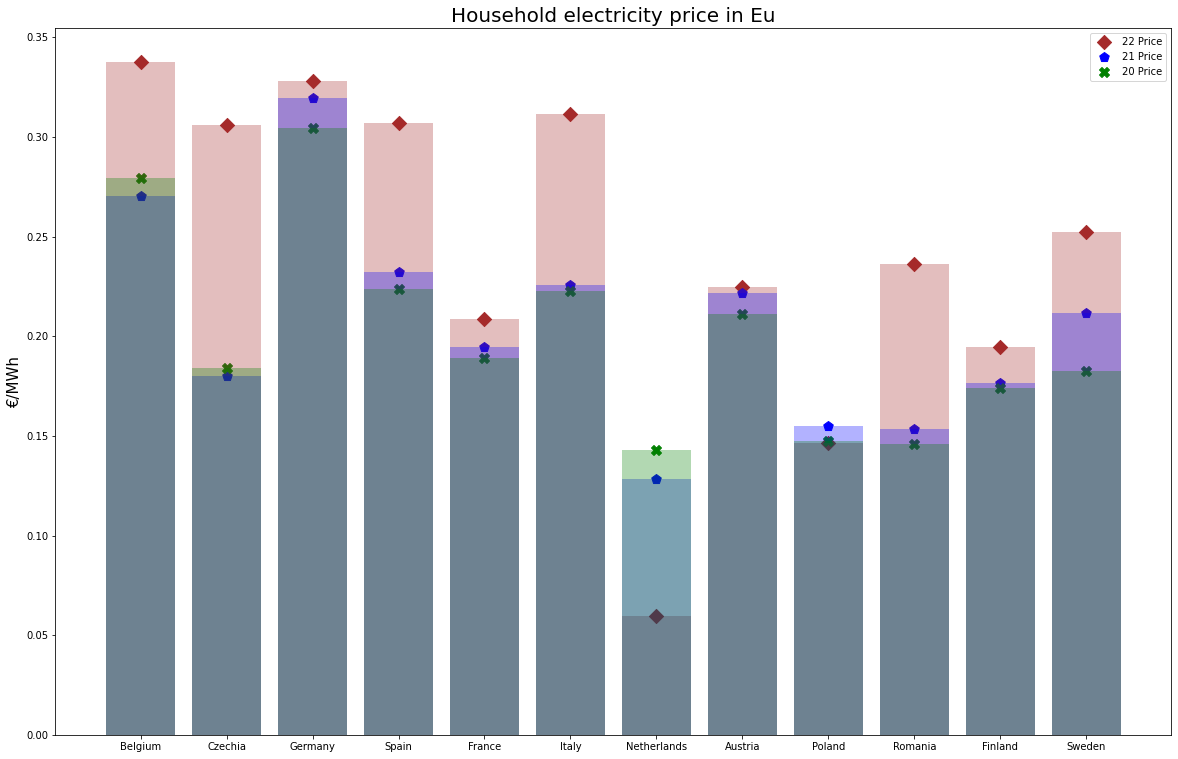

In [ ]:
plt.figure(figsize=(20, 13))
plt.bar(elprice.index,elprice['2022S1'], color='brown', alpha=0.3)
plt.scatter(elprice.index,elprice['2022S1'], s=100, color='brown', marker='D', label='22 Price')
plt.bar(elprice.index,elprice['2021S1'], color='blue', alpha=0.3)
plt.scatter(elprice.index,elprice['2021S1'], s=100, color='blue',  marker='p', label='21 Price')
plt.bar(elprice.index,elprice['2020S1'], color='green', alpha=0.3)
plt.scatter(elprice.index,elprice['2020S1'], s=100, color='green', marker='X', label='20 Price')
plt.legend()
plt.title('Household electricity price in Eu', fontsize=20)
plt.ylabel('€/MWh', fontsize=15)
plt.show()

This plot shows the price of eletricity for each country in 2020, 2021, 2022, highlithing its increment. As predicted, this plot is coherent to the previous one but in includes also year 2020.
In general, most countries have experienced an increment of the price from 2020 to 2022 too, each in different amounts.
Dutch price has again one of the strangest behaviour. In 2022, in particulary, the price has dramatically decreased contrary to all other countries.
Let see what happened looking at some fiscal data.

We import a new dataset of the eletricity price taxes for each country.

In [ ]:
link= 'https://drive.google.com/open?id=1poGO3vBATp3Kgaouydv1Nh3mOqy1BmH6'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('electricity with taxes.xlsx')
eltax=pd.read_excel('electricity with taxes.xlsx')

1poGO3vBATp3Kgaouydv1Nh3mOqy1BmH6


In [ ]:
eltax=pd.DataFrame(eltax).set_index('Country')
eltax=pd.DataFrame(eltax)
extra_country=list()
for country in eltax.index:
  if country not in df3.index:
    extra_country.append(country)
eltax=eltax.drop(index=extra_country)

In [ ]:
eltax

,include taxes,Without VAT,Without taxes,Share of taxes (%),Share of other taxes and levies (%),Share of VAT (%)
Country,,,,,,
Germany,0.3279,0.2756,0.1899,42.086002,26.136017,15.949985
Poland,0.1464,0.1379,0.0912,37.704918,31.898907,5.806011
Finland,0.1945,0.1569,0.1343,30.951157,11.619537,19.331620
Austria,0.2249,0.1874,0.1579,29.791018,13.116941,16.674077
Sweden,0.2525,0.2181,0.1837,27.247525,13.623762,13.623762
France,0.2086,0.1792,0.1548,25.790988,11.697028,14.093960
Romania,0.2362,0.1985,0.1779,24.682472,8.721423,15.961050
Czechia,0.3059,0.2532,0.2313,24.387055,7.159202,17.227852
Belgium,0.3377,0.3014,0.2739,18.892508,8.143322,10.749186


In [ ]:
eltax_chart1=eltax.drop(columns=['Share of taxes (%)',	'Share of other taxes and levies (%)',	'Share of VAT (%)'])
eltax_no_ne=eltax_chart1.drop(index='Netherlands')
eltax_chart1.plot.bar(title='Components of electricity price',stacked=True,figsize=(1100,800))

Figure(id='1340', ...)

Netherlands is known to have a different and particular fiscal system.

In [ ]:
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.layouts import row
from bokeh.plotting import figure

In [ ]:
eltax_chart2=eltax.drop(index=['Netherlands'],columns=['include taxes',	'Without VAT',	'Without taxes'])
eltax_chart22=eltax.drop(columns=['include taxes',	'Without VAT',	'Without taxes'])
eltax_chart22=eltax_chart22[eltax_chart22.index=='Netherlands']
eltax_chart2.plot.bar(title='Share of taxes in the electricity price', figsize=(1100,800))

Figure(id='1526', ...)

In [ ]:
eltax_chart22.plot.bar(title='Netherlands share of taxes in the electricity price', figsize=(600,400))

Figure(id='1721', ...)

Now we move into the understanding of which countries have experienced the greatest increse in electricity price between the first semester of 2021 and the first semester of 2022.
At the top of our ranking we find Czechia, Romania, Italy and Spain. As aforementioned Netherlands has a different policy in term of energy taxes and this is a reason why it is located at the bottom with a huge -53% in a year.
Poland, Austria, Germany and France did not suffered the consequences of energy supply and faced a quite stability in change rates.

The following step of the analysis aims to investigate which is the cause of these variations. Countries have different energy mix and the choice of what source pick has an impact especially in years of raw materials high inflation.
The pie plot is a well fitting model to depict how much of each energy source has been chosen by european countries.

The two following grids shows the share of energy sources adopted first by the top 4 countries in price increasing and secondly by the bottom 4.

In [ ]:
czpercent=df2[year21].loc['Czechia']/df2['21Total'].loc['Czechia']
itpercent=df2[year21].loc['Italy']/df2['21Total'].loc['Italy']
ropercent=df2[year21].loc['Romania']/df2['21Total'].loc['Romania']
espercent=df2[year21].loc['Spain']/df2['21Total'].loc['Spain']

Energy mix pie plot of the top 4 countries that had the greatest price growths.

Text(0.5, 1.0, 'Spanish energy mix')

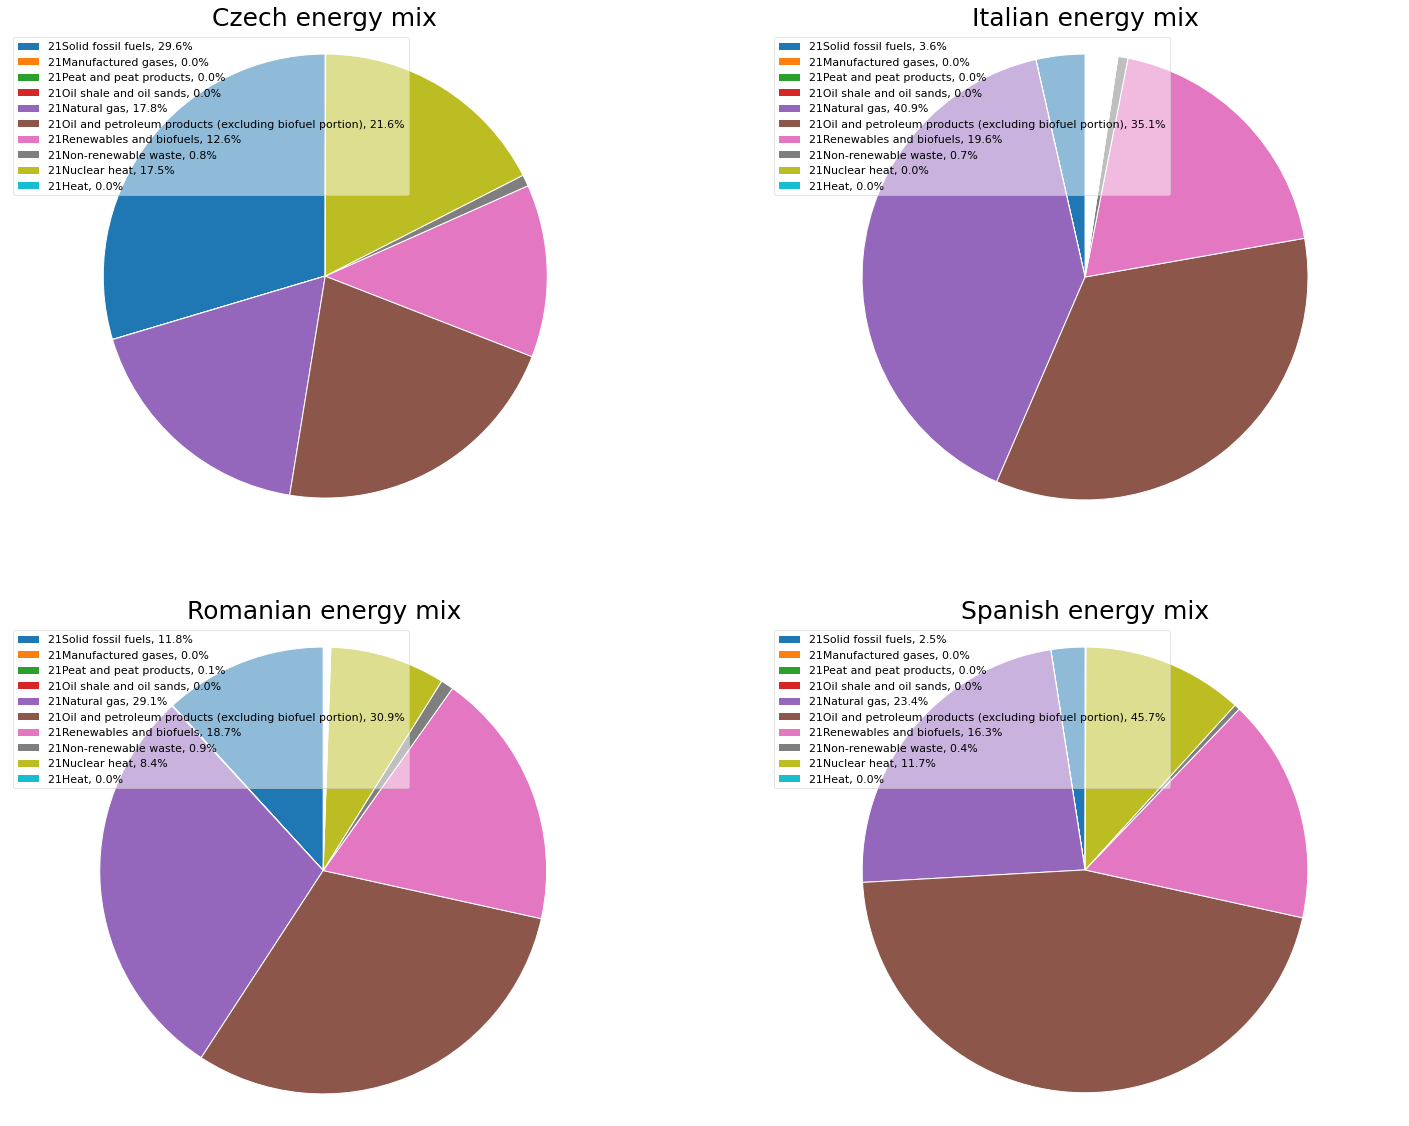

In [ ]:
fig = plt.figure(figsize=(25,20))
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
_, _ = ax1.pie(czpercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax1.axis('equal')
total = sum(czpercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, czpercent )],  framealpha=0.5,
    prop={'size': 11},)
plt.title('Czech energy mix', fontsize=25)

#first row sec column
ax2 = plt.subplot2grid((2,2), (0, 1))
_, _ = ax2.pie(itpercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax2.axis('equal')
total = sum(itpercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, itpercent )],  framealpha=0.5,
    prop={'size': 11},)
plt.title('Italian energy mix', fontsize=25)

#Second row first column
ax3 = plt.subplot2grid((2,2), (1, 0))
_, _ = ax3.pie(ropercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax3.axis('equal')
ax3.set_title('Romanian energy mix')
total = sum(ropercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, ropercent )],  framealpha=0.5,
    prop={'size': 11},)
plt.title('Romanian energy mix', fontsize=25)

#second row second column
ax4 = plt.subplot2grid((2,2), (1, 1))
_, _ = ax4.pie(espercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax4.axis('equal')
ax4.set_title('Spanish energy mix')
total = sum(espercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, espercent )],  framealpha=0.5,
    prop={'size': 11},)
plt.title('Spanish energy mix', fontsize=25)

The general trend is that these countries make significant oil and gas consumption.
The Czech Republic differs slightly from the others, which, while maintaining a good percentage of gas and oil, also has a good percentage of solid fossil fuel.

In [ ]:
frpercent=df2[year21].loc['France']/df2['21Total'].loc['France']
gepercent=df2[year21].loc['Germany']/df2['21Total'].loc['Germany']
apercent=df2[year21].loc['Austria']/df2['21Total'].loc['Austria']
plpercent=df2[year21].loc['Poland']/df2['21Total'].loc['Poland']

Energy mix pie plot of the top 4 countries that had the smallest price growths.

Text(0.5, 1.0, 'Austrian energy mix')

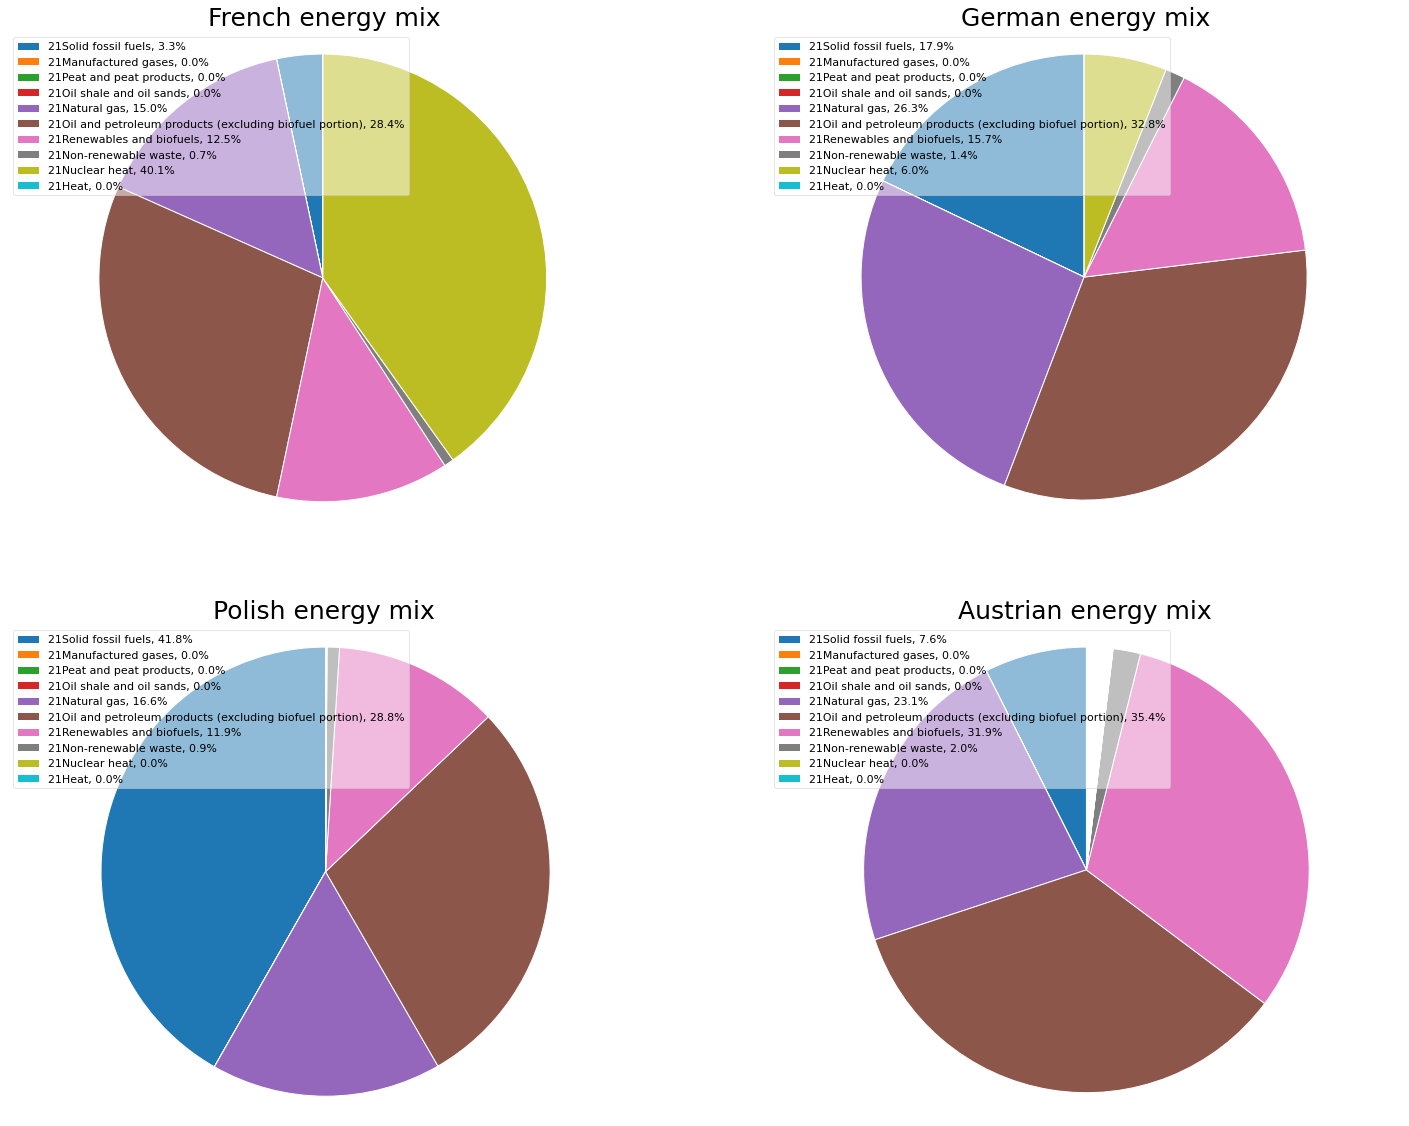

In [ ]:



fig = plt.figure(figsize=(25,20))
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
_, _ = ax1.pie(frpercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax1.axis('equal')
total = sum(frpercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, frpercent )],framealpha=0.5,
    prop={'size': 11},)
plt.title('French energy mix', fontsize=25)

#first row sec column
ax2 = plt.subplot2grid((2,2), (0, 1))
_, _ = ax2.pie(gepercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax2.axis('equal')
total = sum(gepercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, gepercent )], framealpha=0.5,
    prop={'size': 11},)
plt.title('German energy mix', fontsize=25)

#Second row first column
ax3 = plt.subplot2grid((2,2), (1, 0))
_, _ = ax3.pie(plpercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax3.axis('equal')
total = sum(plpercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, plpercent )], framealpha=0.5,
    prop={'size': 11},)
plt.title('Polish energy mix', fontsize=25)

#second row second column
ax4 = plt.subplot2grid((2,2), (1, 1))
_, _ = ax4.pie(apercent, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax4.axis('equal')
total = sum(apercent)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(year21, apercent )], framealpha=0.5,
    prop={'size': 11},)
plt.title('Austrian energy mix', fontsize=25)

These four countries do not follow a common trend.
France is primarly based on nuclear heat and oil, showing a smaller portion of natural gas then the previuos four.
Germany, like Czech Republic, is a special case. Its electricity production is divided fairly proportionally between oil gas and solid fussel consumption.
Polish energy mix is Poland's main resources are still solid fossil fuels and oil and petroleum products.
Austria, instead, makes a significant use of renewable sources.
Generally we can say that these four countries are less dependent on natural gas.

Oil&Gas, as shown above, are frequent used energy sources. Let's see now if the evolution of gas and oil is somehow connected with the inflation in the electricity prices. In Europe the reference price for gas is the one traded at the Dutch TTF meanwhile Brent oil is adopted by Europe, Middle East and Africa.
We load another dataset concerning the daily price of natural gas and oil.

In [ ]:
link= 'https://drive.google.com/open?id=1DqWr4Pj4VvbOWgRSbH1AAsVmrkUKZIIl'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Dutch TTF natural Gas Futures Historical Data.xlsx')
ttf=pd.read_excel('Dutch TTF natural Gas Futures Historical Data.xlsx')

1DqWr4Pj4VvbOWgRSbH1AAsVmrkUKZIIl


In [ ]:
ttf=pd.DataFrame(ttf)
#.set_index('Date')

We convert the monthly based data of ttf dataset in semester based, computing the price mean for each semester.
Now the dataset has the same structure of the previous ones.

In [ ]:
sem=1
pricesum=0
i=0
monthsavg=list()
for rows in range(len(ttf)):
  pricesum+=ttf['Price'].loc[rows]
  if sem % 6 == 0:
    monthsavg.append(pricesum/6)
    pricesum=0
  sem+=1

In [ ]:
semester=['2018S1','2018S2','2019S1','2019S2','2020S1','2020S2','2021S1','2021S2','2022S1']
semester.reverse()
d=dict()
d = {semester[i]: monthsavg[i] for i in range(len(semester))}

In [ ]:
gasprice=pd.DataFrame.from_dict(d, orient='index')
gasprice.columns=['Gas Price']

Now we want to create a new dataframe adding this column to the dataframe containg the development price by semester of the four countries that have experienced an highest price increment.

In [ ]:
epd1=epd.set_index('Country')
selectedcountry=['Italy','Spain','Romania','Czechia']
drop=list()
for country in epd1.index:
  if country not in selectedcountry:
    drop.append(country)

In [ ]:
epd1=epd1.drop(index=drop)
epd2t=epd1.transpose()

In [ ]:
epd2t['Gas Price']=list(gasprice['Gas Price'].iloc[::-1])
epd2t

Country,Czechia,Spain,Italy,Romania,Gas Price
2018-S1,4.01,0.2383,0.2067,0.6206,28.550000
2018-S2,4.09,0.2477,0.2161,0.613,32.708333
2019-S1,4.49,0.2403,0.2301,0.644,21.150000
2019-S2,4.54,0.2394,0.2341,0.6748,18.400000
2020-S1,4.85,0.2239,0.2226,0.7028,15.466667
2020-S2,4.77,0.2298,0.2153,0.7041,15.325000
2021-S1,4.66,0.2323,0.2259,0.7531,34.008333
2021-S2,4.79,0.2816,0.236,0.7913,78.558333
2022-S1,7.54,0.3071,0.3115,1.1683,115.900000


Now we repeat the same process, loading a new dataset concerning Brent oil price.

In [ ]:
link= 'https://drive.google.com/open?id=11Dcb5B80jWmIPHkp61RT2T0lAeoiDlmT'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('brent 5y.csv')
brent=pd.read_csv('brent 5y.csv')

11Dcb5B80jWmIPHkp61RT2T0lAeoiDlmT


In [ ]:
brent1=brent.drop(columns=['Volume', 'Open', 'High', 'Low'])
brent2=brent1.iloc[::-1]
brent2c=brent2.assign(dataok='NA')


In [ ]:
for i in range(len(brent2c.index)):
  a=brent2c.iloc[i][0]
  b=a.split("/")
  c=b[2]+'/'+b[0]
  brent2c.loc[i, 'dataok'] = c
brent_mean = brent2c.groupby('dataok').mean()
#brent_mean

In [ ]:
drop=['2022/12','2022/11','2022/10','2022/09','2022/08','2022/07']
brent_mean=brent_mean.drop(index=drop)

In [ ]:
sem=1
pricesum=0
i=0
monthsavg=list()
for rows in brent_mean.index:
  pricesum+=brent_mean['Close/Last'].loc[rows]
  if sem % 6 == 0:
    monthsavg.append(pricesum/6)
    pricesum=0
  sem+=1

In [ ]:
semester=['2018S1','2018S2','2019S1','2019S2','2020S1','2020S2','2021S1','2021S2','2022S1']
semester.reverse()
d=dict()
d = {semester[i]: monthsavg[i] for i in range(len(semester))}

In [ ]:
oilprice=pd.DataFrame.from_dict(d, orient='index')
oilprice.columns=['Oil Price']

That is the final dataframe that contains eletricity price development of the four highest countries, gas price and oil price for each semester from 2018 to 2022.

In [ ]:
epd2t['Oil Price']=list(oilprice['Oil Price'])
epd2t

Country,Czechia,Spain,Italy,Romania,Gas Price,Oil Price
2018-S1,4.01,0.2383,0.2067,0.6206,28.550000,92.776120
2018-S2,4.09,0.2477,0.2161,0.613,32.708333,104.405174
2019-S1,4.49,0.2403,0.2301,0.644,21.150000,76.530884
2019-S2,4.54,0.2394,0.2341,0.6748,18.400000,65.313204
2020-S1,4.85,0.2239,0.2226,0.7028,15.466667,44.303594
2020-S2,4.77,0.2298,0.2153,0.7041,15.325000,42.090457
2021-S1,4.66,0.2323,0.2259,0.7531,34.008333,62.217696
2021-S2,4.79,0.2816,0.236,0.7913,78.558333,65.991364
2022-S1,7.54,0.3071,0.3115,1.1683,115.900000,72.000109


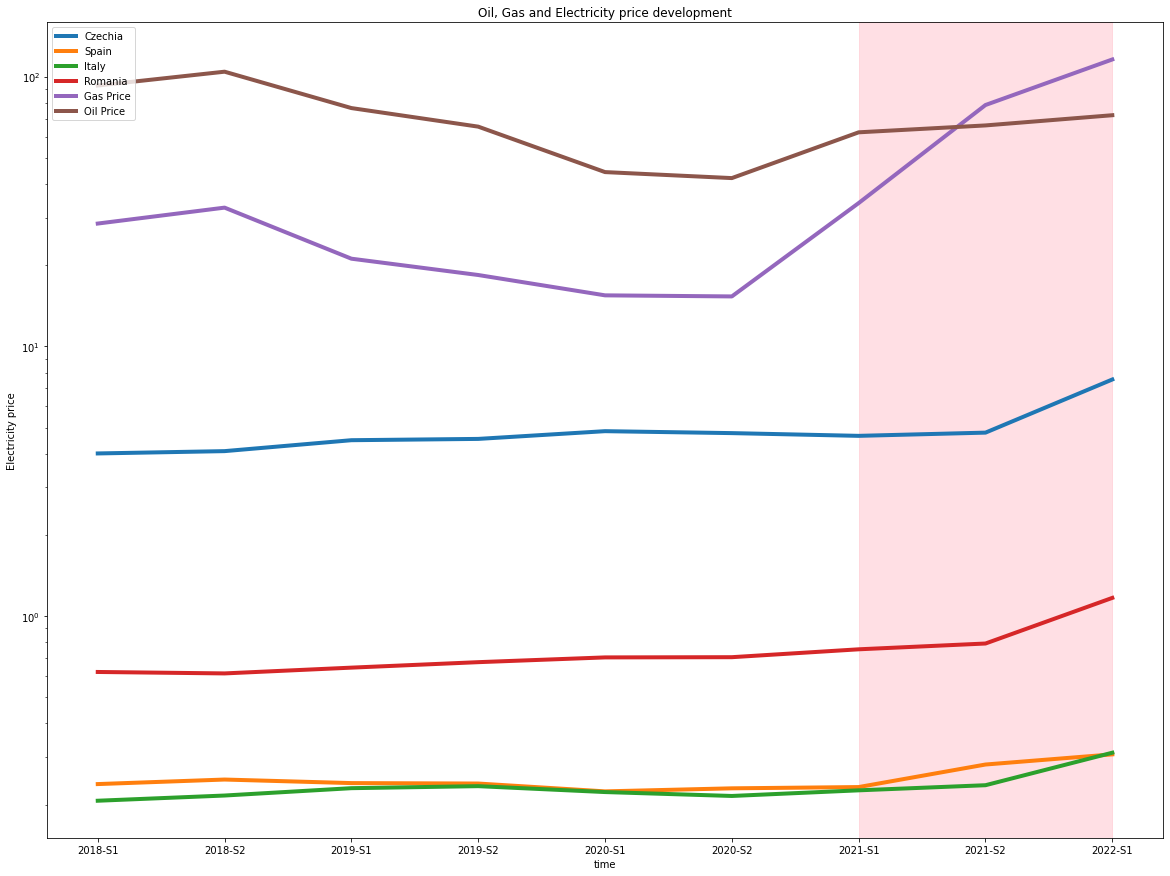

In [ ]:
fig, ax= plt.subplots(figsize=(20,15))
#plt.subplots_adjust(left=0.2, bottom=0.2, right=2.5, top=2.5)
for i in epd2t.columns:
  plt.plot(epd2t[i], label=i, linewidth=4)
plt.yscale('log')
plt.xlabel('time')
ax.axvspan('2021-S1', '2022-S1', color="pink", alpha=0.5)
plt.ylabel('Electricity price')
plt.title('Oil, Gas and Electricity price development')
plt.legend(loc='upper left')
plt.show()


We plot in a line chart gas and oil price together with the most and the less inflated countries. What we uncovered in the first chart is a pretty tendency of the prices to follow the growth of energy sources. This occurs particulary in the red highlighted frame that represents the period of inflation pick. In other words, eletricity prices have experienced a correlation with raw materials prices since the beginning of 2021.

The graphs have a base-10 logarithmic scale on the y-axis. Brent gas and TTF gas have much larger values than the electricity/MWh price.
In addition, the prices for Poland and the Czech Republic are still expressed in Euros despite the fact that it is not their currency, thus also being affected by currency exchange.
This would lead to problems in visualizing correctly, so it was chosen to standardize all values using the logarithmic scale.

In [ ]:
drop=['Belgium','Czechia','Spain','Italy','Netherlands','Romania','Finland','Sweden']
elprice_chart2=elprice.drop(index=drop)
elprice_chart2=elprice_chart2.transpose()

In [ ]:
elprice_chart2['Oil Price']=oilprice['Oil Price']
elprice_chart2['Gas Price']=gasprice['Gas Price']

In [ ]:
epd1=epd.set_index('Country')
selectedcountry=['France','Germany','Poland','Austria']
drop=list()
for country in epd1.index:
  if country not in selectedcountry:
    drop.append(country)

In [ ]:
epd1=epd1.drop(index=drop)
epd1=epd1.transpose()

In [ ]:
epd1['Oil Price']=list(oilprice['Oil Price'].iloc[::-1])
epd1['Gas Price']=list(gasprice['Gas Price'].iloc[::-1])


In [ ]:
epd1

Country,Germany,France,Austria,Poland,Oil Price,Gas Price
2018-S1,0.2987,0.1748,0.1966,0.595,72.000109,28.550000
2018-S2,0.3,0.1799,0.2012,0.6006,65.991364,32.708333
2019-S1,0.3088,0.1778,0.2034,0.5764,62.217696,21.150000
2019-S2,0.2878,0.1913,0.2074,0.592,42.090457,18.400000
2020-S1,0.3043,0.1893,0.2111,0.651,44.303594,15.466667
2020-S2,0.3006,0.1958,0.2167,0.6754,65.313204,15.325000
2021-S1,0.3193,0.1946,0.2216,0.7026,76.530884,34.008333
2021-S2,0.3234,0.2022,0.2285,0.7226,104.405174,78.558333
2022-S1,0.3279,0.2086,0.2249,0.6787,92.776120,115.900000


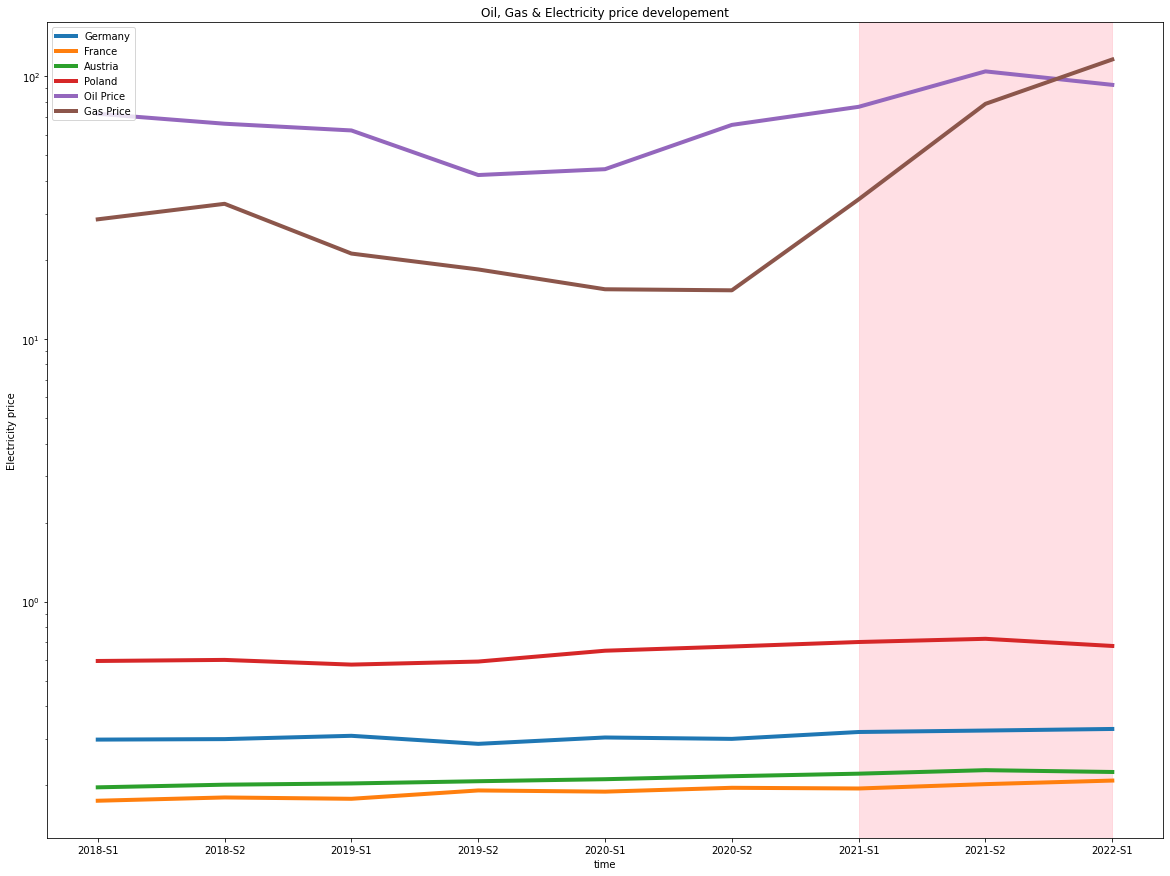

In [ ]:
fig, ax= plt.subplots(figsize=(20,15))
#plt.subplots_adjust(left=0.2, bottom=0.2, right=2.5, top=2.5)
for i in epd1.columns:
  plt.plot(epd1[i], label=i, linewidth=4)
plt.yscale('log')
plt.xlabel('time')
ax.axvspan('2021-S1', '2022-S1', color="pink", alpha=0.5)
plt.ylabel('Electricity price')
plt.title('Oil, Gas & Electricity price developement')
plt.legend(loc='upper left')
plt.show()


Not the same happens in the last line chart. Germany, France, Austria and Poland looks more independent from gas and oil inflation. The change rate is quite stable along the timeframe.

The next step in the analysis is to fit linear regression models that take as the independent variable (x) the gas price and as the dependent variable (y) the electricity price of each of the 8 significant countries in the 9 semesters analyzed earlier.

In [ ]:
small_country=list()
for country in elchg.index:
  if country not in df3.index:
    small_country.append(country)

elchg=elchg.drop(index=small_country)

In [ ]:
from bokeh.models.markers import Y
'''
linear regression
y=eletricity price country with gas addiction
x=price of gas
'''

yCZ=epd2t[["Czechia"]]
xCZ=epd2t["Gas Price"]

for i in yCZ:
  yCZ=yCZ.astype(np.float64)
xCZ=sm.add_constant(xCZ)



lmCZ=sm.OLS(yCZ,xCZ).fit()
lmCZ.summary()



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Czechia   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     13.20
Date:                Thu, 26 Jan 2023   Prob (F-statistic):            0.00836
Time:                        17:49:31   Log-Likelihood:                -7.8948
No. Observations:                   9   AIC:                             19.79
Df Residuals:                       7   BIC:                             20.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8762      0.349     11.113      0.000       3.051       4.701
Gas Price      0.0246      0.007      3.633      0.008       0.009       0.041
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.616
Skew:                          -0.309   Prob(JB):                        0.735
Kurtosis:                       1.878   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
yRO=epd2t["Romania"]
xRO=epd2t["Gas Price"]
for i in yRO:
  yRO=yRO.astype(np.float64)

xRO=sm.add_constant(xRO)

lmRO=sm.OLS(yRO,xRO).fit()
lmRO.summary()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Romania   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     25.87
Date:                Thu, 26 Jan 2023   Prob (F-statistic):            0.00142
Time:                        17:49:31   Log-Likelihood:                 10.637
No. Observations:                   9   AIC:                            -17.27
Df Residuals:                       7   BIC:                            -16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5657      0.044     12.713      0.000       0.460       0.671
Gas Price      0.0044      0.001      5.086      0.001       0.002       0.006
==============================================================================
Omnibus:                        1.964   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                0.918
Skew:                          -0.367   Prob(JB):                        0.632
Kurtosis:                       1.618   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

ySP=epd2t["Spain"]
xSP=epd2t["Gas Price"]
for i in ySP:
  ySP=ySP.astype(np.float64)

xSP=sm.add_constant(xSP)

lmSP=sm.OLS(ySP,xSP).fit()
lmSP.summary()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Spain   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     133.7
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           8.15e-06
Time:                        17:49:31   Log-Likelihood:                 33.643
No. Observations:                   9   AIC:                            -63.29
Df Residuals:                       7   BIC:                            -62.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      0.003     63.126      0.000       0.210       0.226
Gas Price      0.0008    6.7e-05     11.564      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.836
Skew:                          -0.727   Prob(JB):                        0.658
Kurtosis:                       2.666   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
yIT=epd2t["Italy"]
xIT=epd2t["Gas Price"]
for i in yIT:
  yIT=yIT.astype(np.float64)

xIT=sm.add_constant(xIT)

lmIT=sm.OLS(yIT,xIT).fit()
lmIT.summary()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Italy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.72
Date:                Thu, 26 Jan 2023   Prob (F-statistic):            0.00345
Time:                        17:49:31   Log-Likelihood:                 24.914
No. Observations:                   9   AIC:                            -45.83
Df Residuals:                       7   BIC:                            -45.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2026      0.009     22.242      0.000       0.181       0.224
Gas Price      0.0008      0.000      4.327      0.003       0.000       0.001
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.622
Skew:                          -0.322   Prob(JB):                        0.733
Kurtosis:                       1.884   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

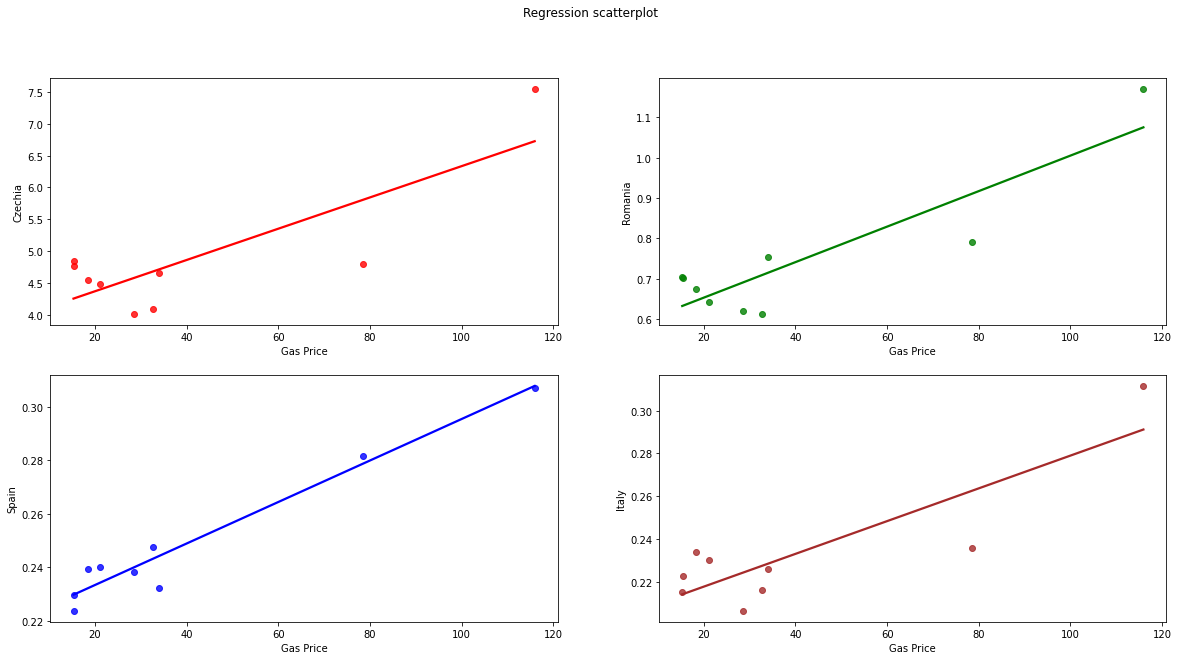

In [ ]:
'''
2x2 scatterplot grid with top4 countries due to bill increment in regression with the price of gas
'''

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle('Regression scatterplot')

sn.regplot( "Gas Price", yCZ,data=epd2t, ci=None, ax=axes[0,0],scatter_kws={"color": "red"}, line_kws={"color": "red"})
#plt.title('Spain eletricity price versus gas price')

sn.regplot("Gas Price", yRO, data=epd2t, ci=None, ax=axes[0,1],scatter_kws={"color": "green"}, line_kws={"color": "green"})
#plt.title('Romania eletricity price versus gas price')

sn.regplot("Gas Price", ySP, data=epd2t, ci=None, ax=axes[1,0],scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
#plt.title('Spain eletricity price versus gas price')

sn.regplot("Gas Price", yIT, data=epd2t, ci=None, ax=axes[1,1],scatter_kws={"color": "brown"}, line_kws={"color": "brown"})
#plt.title('Italy eletricity price versus gas price')

From the results of the regressions, it can be seen that the gas price is a statistically significant coefficient with respect to the electricity price of the four countries with the highest growth, as the p-values are all less than 0.05. This means that we are 95% confident that all four coefficients are not equal to zero.
The quality of the model can be seen from the analysis of R^2. In all the first 4 cases R^2 is greater than 0.5, and this means that the model fits the data trend reasonably well. The data are well approximated by the regression line and, as can be seen in the graphical representation, are distributed around the line.
Thus, the regression shows that the price of electricity is statistically dependent on the price of gas.



In [ ]:
from bokeh.models.markers import Y

yGE=epd1["Germany"]
xGE=epd1["Gas Price"]

for i in yGE:
  yGE=yGE.astype(np.float64)

xGE=sm.add_constant(xGE)



lmGE=sm.OLS(yGE, xGE).fit()
lmGE.summary()





/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Germany   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     12.22
Date:                Thu, 26 Jan 2023   Prob (F-statistic):             0.0100
Time:                        17:49:33   Log-Likelihood:                 31.271
No. Observations:                   9   AIC:                            -58.54
Df Residuals:                       7   BIC:                            -58.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.004     65.797      0.000       0.285       0.306
Gas Price      0.0003   8.72e-05      3.496      0.010    9.87e-05       0.001
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.130
Skew:                          -0.026   Prob(JB):                        0.937
Kurtosis:                       2.413   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from xlrd.formatting import XFBorder
yFR=epd1["France"]
xFR=epd1["Gas Price"]

for i in yFR:
  yFR=yFR.astype(np.float64)

xFR=sm.add_constant(xFR)



lmFR=sm.OLS(yFR,xFR).fit()
lmFR.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 France   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     6.569
Date:                Thu, 26 Jan 2023   Prob (F-statistic):             0.0374
Time:                        17:49:33   Log-Likelihood:                 31.040
No. Observations:                   9   AIC:                            -58.08
Df Residuals:                       7   BIC:                            -57.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.005     39.324      0.000       0.170       0.192
Gas Price      0.0002   8.95e-05      2.563      0.037    1.77e-05       0.000
==============================================================================
Omnibus:                        1.180   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.788
Skew:                          -0.419   Prob(JB):                        0.674
Kurtosis:                       1.817   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from seaborn.regression import lmplot
yPO=epd1["Poland"]
xPO=epd1["Gas Price"]

for i in yPO:
  yPO=yPO.astype(np.float64)

xPO=sm.add_constant(xPO)



lmPO=sm.OLS(yPO,xPO).fit()
lmPO.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Poland   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.493
Date:                Thu, 26 Jan 2023   Prob (F-statistic):              0.158
Time:                        17:49:33   Log-Likelihood:                 15.384
No. Observations:                   9   AIC:                            -26.77
Df Residuals:                       7   BIC:                            -26.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6116      0.026     23.293      0.000       0.550       0.674
Gas Price      0.0008      0.001      1.579      0.158      -0.000       0.002
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                1.204
Skew:                           0.273   Prob(JB):                        0.548
Kurtosis:                       1.294   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y=epd1["Austria"]
x=epd1["Gas Price"]

for i in y:
  y=y.astype(np.float64)

x=sm.add_constant(x)



lmAU=sm.OLS(y,x).fit()
lmAU.summary()





/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Austria   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     4.910
Date:                Thu, 26 Jan 2023   Prob (F-statistic):             0.0622
Time:                        17:49:33   Log-Likelihood:                 30.588
No. Observations:                   9   AIC:                            -57.18
Df Residuals:                       7   BIC:                            -56.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2040      0.005     42.084      0.000       0.193       0.216
Gas Price      0.0002   9.41e-05      2.216      0.062    -1.4e-05       0.000
==============================================================================
Omnibus:                        1.139   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.667
Skew:                          -0.186   Prob(JB):                        0.716
Kurtosis:                       1.719   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

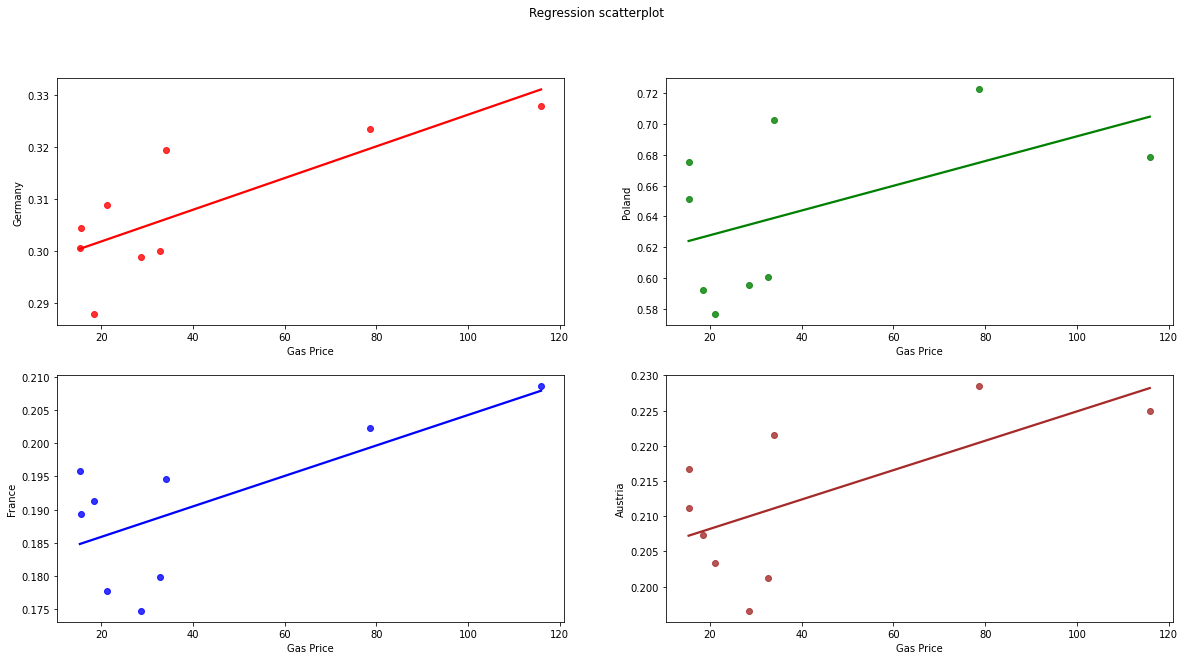

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle('Regression scatterplot')

sn.regplot( "Gas Price", yGE, data=epd2t, ci=None, ax=axes[0,0],scatter_kws={"color": "red"}, line_kws={"color": "red"})
#plt.title('Spain eletricity price versus gas price')

sn.regplot("Gas Price", yPO, data=epd2t, ci=None, ax=axes[0,1],scatter_kws={"color": "green"}, line_kws={"color": "green"})
#plt.title('Romania eletricity price versus gas price')

sn.regplot("Gas Price", yFR, data=epd2t, ci=None, ax=axes[1,0],scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
#plt.title('Spain eletricity price versus gas price')

sn.regplot("Gas Price", y, data=epd2t, ci=None, ax=axes[1,1],scatter_kws={"color": "brown"}, line_kws={"color": "brown"})
#plt.title('Italy eletricity price versus gas price')

Considering, on the other hand, the four countries with lower energy price growth, we see that the p-values are higher, reflecting a lower and sometimes zero significance of the model. This reflects the idea that the coefficients may be 0. R^2 is also lower than in previous models, often not even exceeding the threshold value of 0.5.
This is due to the fact that these countries do not have a high dependence on gas, and therefore the increase in the price of gas does not affect their electricity prices.

Slightly deviating from the general trend are Czechia and Germany, which, as we noted earlier, have different energy mixes from the others .

In [ ]:
epd=pd.DataFrame(epd).set_index('Country')

In [ ]:
selectedcountry=['Italy','Czechia','Romania','Spain','Germany','Austria','France','Poland']
d=dict()
for country in epd.index:
  if country in selectedcountry:
    d[country]=list(epd.loc[country])
matrix=pd.DataFrame(d)
matrix['Oil Price']=list(epd1['Oil Price'])
matrix['Gas Price']=list(epd1['Gas Price'])

After a visual representation with the line chart, we wuold like to end the analysis by providing a numeric correlation of the relationship between oil, gas and the household electricity price of the most valuable european countries.

This was done thanks to a correlation matrix. The most relevant results are shown in the columns of Oil and Gas, so the correlation with the price evolution of electricity per country and price of raw materials.

As expected the greatest values in the gas column are performed by the greatest countries in electricity price change rates: respectively Spain, Romania, Italy and Czechia. Germany is just below with a 0.8 correlation with gas.

Gas is far more significant than oil in terms of correlation. Even if oil has experienced periods of inflation it behaves like a less influent cause of the rise of costs for household consumers.

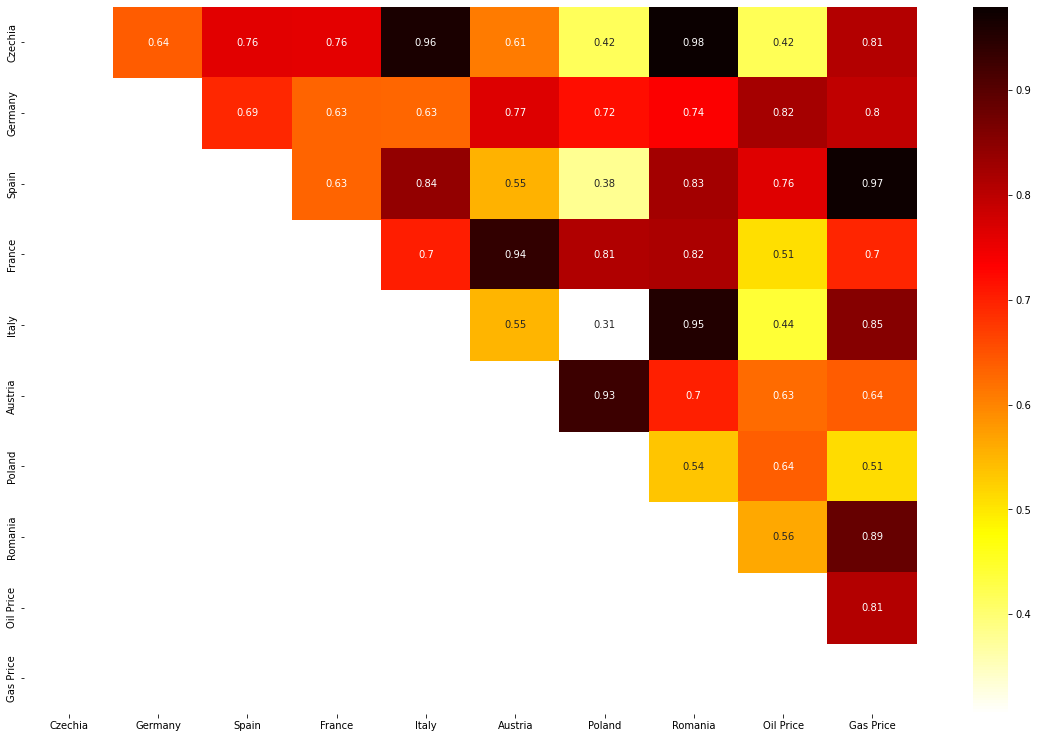

In [ ]:
plt.figure(figsize=(20,13))
corr_matrix=matrix.corr()
sn.heatmap(corr_matrix, annot=True, mask=np.tril(corr_matrix), cmap="hot_r")
plt.show()

In [ ]:
corr_matrix

,Czechia,Germany,Spain,France,Italy,Austria,Poland,Romania,Oil Price,Gas Price
Czechia,1.000000,0.642075,0.762595,0.759809,0.962936,0.609073,0.417968,0.979400,0.419017,0.808396
Germany,0.642075,1.000000,0.693405,0.632031,0.630793,0.766668,0.719878,0.736137,0.822788,0.797397
Spain,0.762595,0.693405,1.000000,0.634066,0.841896,0.553805,0.378793,0.825948,0.763598,0.974813
France,0.759809,0.632031,0.634066,1.000000,0.704070,0.938401,0.812384,0.816274,0.507953,0.695773
Italy,0.962936,0.630793,0.841896,0.704070,1.000000,0.552475,0.305016,0.953849,0.439970,0.853139
Austria,0.609073,0.766668,0.553805,0.938401,0.552475,1.000000,0.927984,0.700443,0.625673,0.642091
Poland,0.417968,0.719878,0.378793,0.812384,0.305016,0.927984,1.000000,0.535384,0.638932,0.512427
Romania,0.979400,0.736137,0.825948,0.816274,0.953849,0.700443,0.535384,1.000000,0.563192,0.887147
Oil Price,0.419017,0.822788,0.763598,0.507953,0.439970,0.625673,0.638932,0.563192,1.000000,0.808786
Gas Price,0.808396,0.797397,0.974813,0.695773,0.853139,0.642091,0.512427,0.887147,0.808786,1.000000


**Conclusion**


On balance, we have started our analysis by importing the european countries energy mix. Not every country
has faced the same electricity price inflation effects. The aim of the study is to investigate how someone
has mitigated those consequences. However, it is necessary to point out that this is a very complex phenomenon
in which multiple variables come into play, and we have analyzed just one. We assume the fiscal policy about
electricity remains constant in time. Anyaway we have shown how this aspect affect prices to households.
We have restricted our anaysis considering 8 countries, the 4 most inflated and the 4 least.
Czechia, Italy, Spain and Romania have experienced the highest price increment while Germany, France, Austria
and Poland the lowest. The analysis highlighted those energy mix: the first four relies mostly on oil and gas
as energy source. The second group, instead, makes a larger use of coal, nuclear and renewables.
Sequently we imported datasets containing oil and gas prices traded at the european commodity market. Statistical
and graphical results show that the growth of raw material started around 2020, has affected the
first group prices, since they are great oil and gas consumers. It can be stated that the price
of gas is one of the causes of electricity price growth and, as a result, the choice not to be dependent
on gas may prove satisfactory in combating the effects of inflation.